# Cloud Microphysics - PyLCM Exercise

Use the same virtual environment you used to install PyLCM originally. The preset values in this notebook are the same as those in the PyLCM_edu.ipynb notebook.

In [1]:
# Import necessary modules
from PyLCM.animation import *
from PyLCM.widget import *
from PyLCM.timestep_routine import *
# Import user modifiable modules
from Post_process.analysis import *
from Post_process.print_plot import *

# Uncomment lines below when changing source files
%load_ext autoreload
%autoreload 2

## Initialisation and initial plots

In [2]:
# Model steering parameters
dt_widget, nt_widget, Condensation_widget, Collision_widget, n_particles_widget, max_z_widget = model_steering_input()

'Model steering parameters'

BoundedFloatText(value=0.5, description='dt [s]:', max=5.0, min=0.0001, style=DescriptionStyle(description_wid…

IntText(value=3600, description='nt:', style=DescriptionStyle(description_width='initial'))

Checkbox(value=True, description='Condensation:', style=CheckboxStyle(description_width='initial'))

Checkbox(value=False, description='Collision:', style=CheckboxStyle(description_width='initial'))

BoundedIntText(value=500, description='n_particles:', max=1000, min=100, style=DescriptionStyle(description_wi…

BoundedFloatText(value=1500.0, description='z_max [m]:', max=2000.0, step=0.1, style=DescriptionStyle(descript…

In [3]:
# Parcel parameters
T_widget, P_widget, RH_widget, w_widget, z_widget = parcel_info_input()
ascending_mode_widget = ascending_mode_input()

'Parcel initial parameters: '

BoundedFloatText(value=293.2, description='T [K]:', max=320.0, min=200.0, step=0.1, style=DescriptionStyle(des…

BoundedFloatText(value=101300.0, description='P [Pa]:', max=105000.0, min=95000.0, step=1.0, style=Description…

BoundedFloatText(value=0.88, description='RH [-]:', max=0.99, min=0.01, step=0.01, style=DescriptionStyle(desc…

BoundedFloatText(value=0.5, description='w [m/s]:', max=10.0, step=0.1, style=DescriptionStyle(description_wid…

BoundedFloatText(value=0.0, description='z [m]:', max=20000.0, step=100.0, style=DescriptionStyle(description_…

ToggleButtons(description='Mode', layout=Layout(width='max-content'), options=('linear', 'sine', 'in_cloud_osc…

In [4]:
# Use activation radius with kohler critical radius
kohler_widget = kohler_settings()

# Choose the mode for aerosol initialization
mode_aero_init_widget = aero_mode_input()
# Initialisation parameters for aerosol (up to 4 modes)
gridwidget = grid_modes_input()

'Set activation radius using Koehler critical radius, otherwise activation radius is 1 µm'

Checkbox(value=False, description='Koehler critical radius', layout=Layout(width='max-content'), style=Checkbo…

'Aerosol initialisation mode: '

ToggleButtons(layout=Layout(width='max-content'), options=('weighting_factor', 'random'), value='weighting_fac…

N_aero: number of aerosols per cubic centimeter, mu: mean droplet radius, sigma: std of mu


GridspecLayout(children=(Button(button_style='info', description='Mode #1', layout=Layout(grid_area='widget001…

In [5]:
# Setting of display mode while running: either output of variables in text form (fast, recommended) = 'text'
# or: continuously updated plot using plotly (slow, time & memory consuming) = 'graphics'
mode_displaytype_widget = timestep_display_mode_settings()

'Display mode: '

ToggleButtons(index=1, layout=Layout(width='max-content'), options=('text_fast', 'graphics'), value='graphics'…

In [8]:
nt, dt, time_array, T_parcel_array, RH_parcel_array, q_parcel_array, z_parcel_array, \
qa_ts, qc_ts, qr_ts, \
na_ts, nc_ts, nr_ts, \
spectra_arr, \
con_ts, act_ts, evp_ts, dea_ts, acc_ts, aut_ts \
= timesteps_function(
    n_particles_widget, P_widget, \
    RH_widget, T_widget, w_widget, nt_widget, \
    dt_widget, rm_spec, ascending_mode_widget, \
    mode_displaytype_widget, z_widget, max_z_widget, \
    Condensation_widget, Collision_widget, \
    mode_aero_init_widget, gridwidget, kohler_widget.value
)

value: Time (s)  z (m)    T (K)    qv (g/kg) RH (%)   QC (g/kg) QR (g/kg) NA (/mg) NC (/mg) NR (/mg)
after: 1800.0    900.00   288.85   11.17     100.110   1.781     0.000     1699.54   277.78    0.00    


In [9]:
# Select time-series
mode_plots_widget, increment_widget = plot_widgets_settings(nt)

ToggleButtons(description='Plots are:', layout=Layout(width='max-content'), options=('time-series', 'vertical …

'For droplet spectra: set increment (e.g. 20: every 20th timestep a line is drawn): '

BoundedIntText(value=20, description='For droplet spectra: increment: ', max=3600, min=1, style=DescriptionSty…

c:\Users\zrowl\Desktop\repos\venvs\_phd\PyLCM\PyLCM_edu\Post_process\print_plot.py:25: UserWarning: Log scale: values of z <= 0 have been masked
  contour = ax.contourf(np.arange(nt+1)*dt, 1e6*rm_spec, spectra_arr.T, norm=matplotlib.colors.LogNorm())
c:\Users\zrowl\Desktop\repos\venvs\_phd\PyLCM\PyLCM_edu\Post_process\print_plot.py:216: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


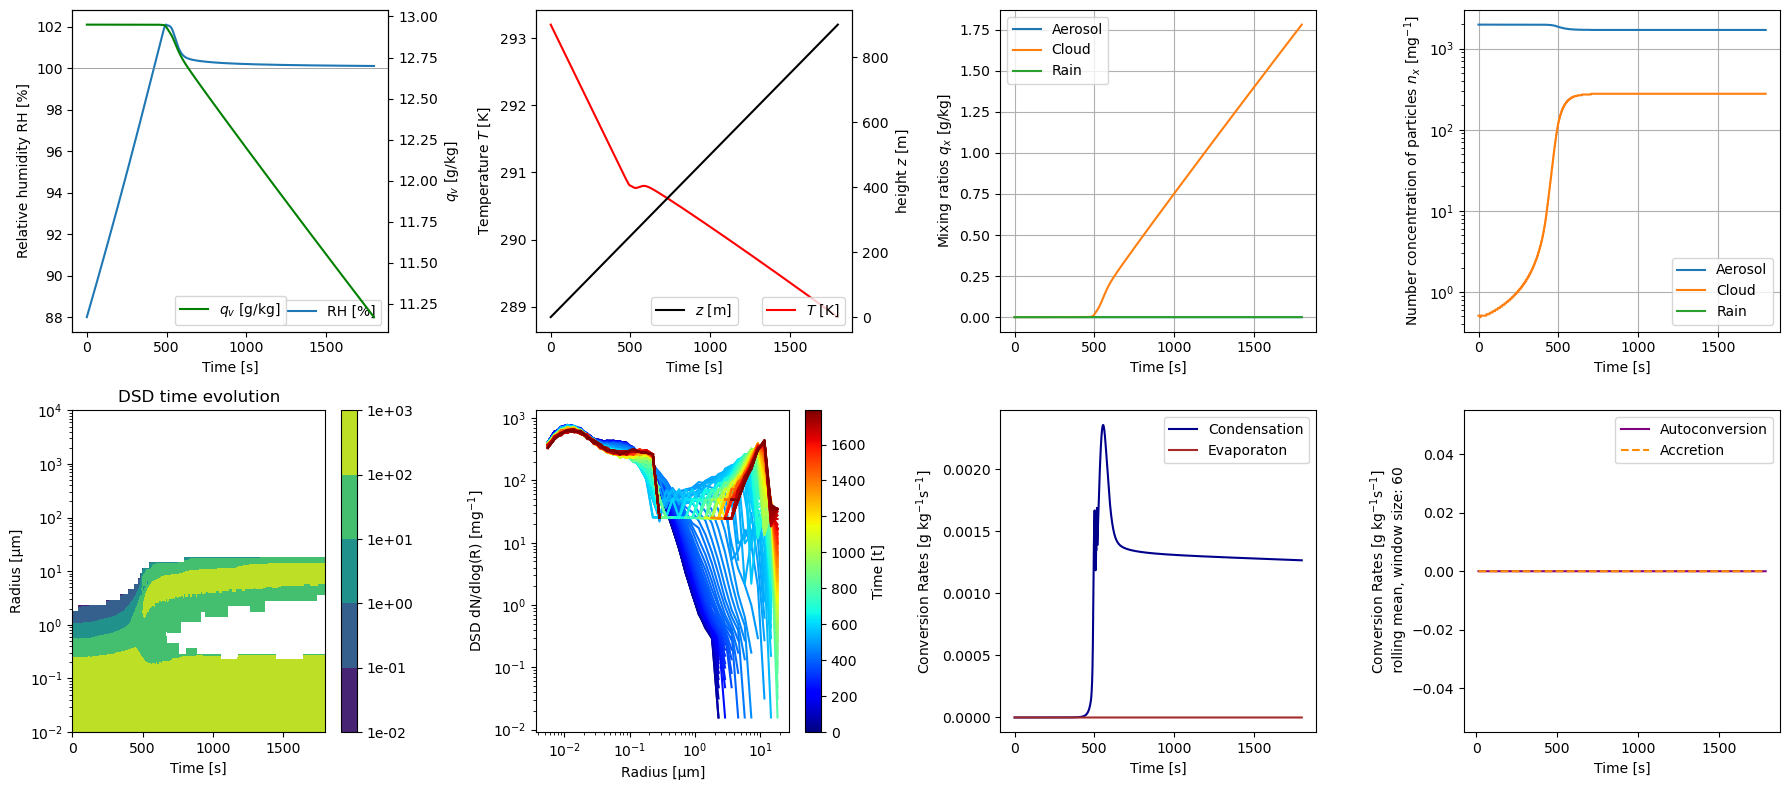

In [10]:
plot_mode=mode_plots_widget.value
subplot_array_function(plot_mode, dt, nt, rm_spec, qa_ts, qc_ts, qr_ts, na_ts, nc_ts, nr_ts, T_parcel_array, RH_parcel_array, q_parcel_array, z_parcel_array, spectra_arr, increment_widget, con_ts, act_ts, evp_ts, dea_ts, acc_ts, aut_ts)

## Exercises

In [9]:
import matplotlib.pyplot as plt
from matplotlib.ticker import (AutoMinorLocator, MultipleLocator)

### Exercise 1

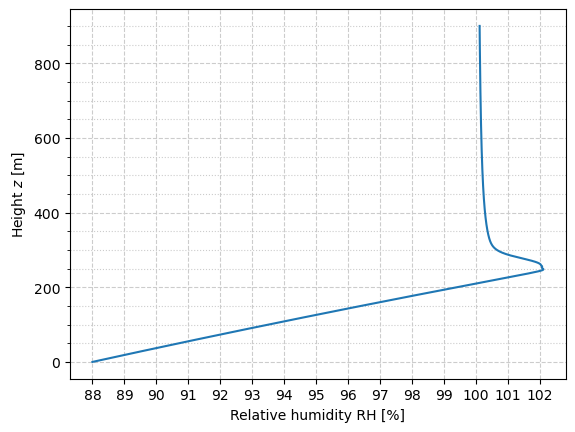

In [35]:
# Substituted RH plot for relative supersaturation plot

# time_array = np.arange(nt+1)*dt

fig, ax = plt.subplots()
ax.plot(RH_parcel_array*100, z_parcel_array)
ax.set_xlabel('Relative humidity RH [%]')
ax.set_ylabel('Height $z$ [m]')

# Major ticks
ax.xaxis.set_major_locator(MultipleLocator(1))
ax.yaxis.set_major_locator(MultipleLocator(200))

# Minor ticks
ax.xaxis.set_minor_locator(AutoMinorLocator(1))
ax.yaxis.set_minor_locator(AutoMinorLocator(4))

ax.grid(which='major', color='#CCCCCC', linestyle='--')
ax.grid(which='minor', color='#CCCCCC', linestyle=':')

- At what height does the parcel reach its LCL? **(ANS: approx. 200 m)**
- What is the concentration of cloud droplets at a height of 100 m? **(ANS: ...)**
- At what height is the cloud base located? **(ANS: 220 m)**
- When does the ascending parcel move through the base of the cloud? **(ANS: ...)**

### Exercise 2

The parcel currently starts at the surface because the corresponding model parameter is set to 'z=0'. Run the model again, this time modifying the parameters such that the parcel starts at 500 m. Also adapt the cloud top height 'z_max' to a value of 1600 m.

- Plot 'relative supersaturation' and 'liquid number mixing ratio' for the new run.
- Add a plot of the 'mean droplet radius'.

You can set values directly by modifying the value attributes of the widgets, if you prefer not to use the widgets (this is done below).

In [6]:
# Model steering parameters
dt_widget.value = 0.5 # s
nt_widget.value = 3600
Condensation_widget.value = True
Collision_widget.value = False
n_particles_widget.value = 500
max_z_widget.value = 1600 # m

# Parcel parameters
T_widget.value = 293.2 # K
P_widget.value = 101300 # Pa
RH_widget.value = 0.88
w_widget.value = 0.5 # ms-1
z_widget.value = 500 # m
ascending_mode_widget.value = 'linear'

# Kohler critical radius Y/N
kohler_widget.value = False

# Mode for aerosol initialization
mode_aero_init_widget.value = 'weighting_factor'

# Initialization parameters for aerosol (up to 4 modes):

# N_aero [cm-3]
gridwidget[1, 0].value = 1000   # mode 1
gridwidget[1, 1].value = 800    # mode 2
gridwidget[1, 2].value = 0.72   # mode 3
gridwidget[1, 3].value = 0      # mode 4

# mu_aero [µm]
gridwidget[2, 0].value = 0.008  # mode 1
gridwidget[2, 1].value = 0.034  # mode 2
gridwidget[2, 2].value = 0.46   # mode 3
gridwidget[2, 3].value = 0      # mode 4

# sigma_aero
gridwidget[3, 0].value = 1.6    # mode 1
gridwidget[3, 1].value = 2.1    # mode 2
gridwidget[3, 2].value = 2.2    # mode 3
gridwidget[3, 3].value = 0      # mode 4

# Display mode
mode_displaytype_widget.value = 'text_fast'

In [7]:
nt, dt, time_array, T_parcel_array, RH_parcel_array, q_parcel_array, z_parcel_array, \
qa_ts, qc_ts, qr_ts, \
na_ts, nc_ts, nr_ts, \
spectra_arr, \
con_ts, act_ts, evp_ts, dea_ts, acc_ts, aut_ts \
= timesteps_function(
    n_particles_widget, P_widget, \
    RH_widget, T_widget, w_widget, nt_widget, \
    dt_widget, rm_spec, ascending_mode_widget, \
    mode_displaytype_widget, z_widget, max_z_widget, \
    Condensation_widget, Collision_widget, \
    mode_aero_init_widget, gridwidget, kohler_widget.value
)

value: Time (s)  z (m)    T (K)    qv (g/kg) RH (%)   QC (g/kg) QR (g/kg) NA (/mg) NC (/mg) NR (/mg)
after: 1800.0    1400.00  288.85   11.17     100.110   1.781     0.000     1699.54   277.78    0.00    


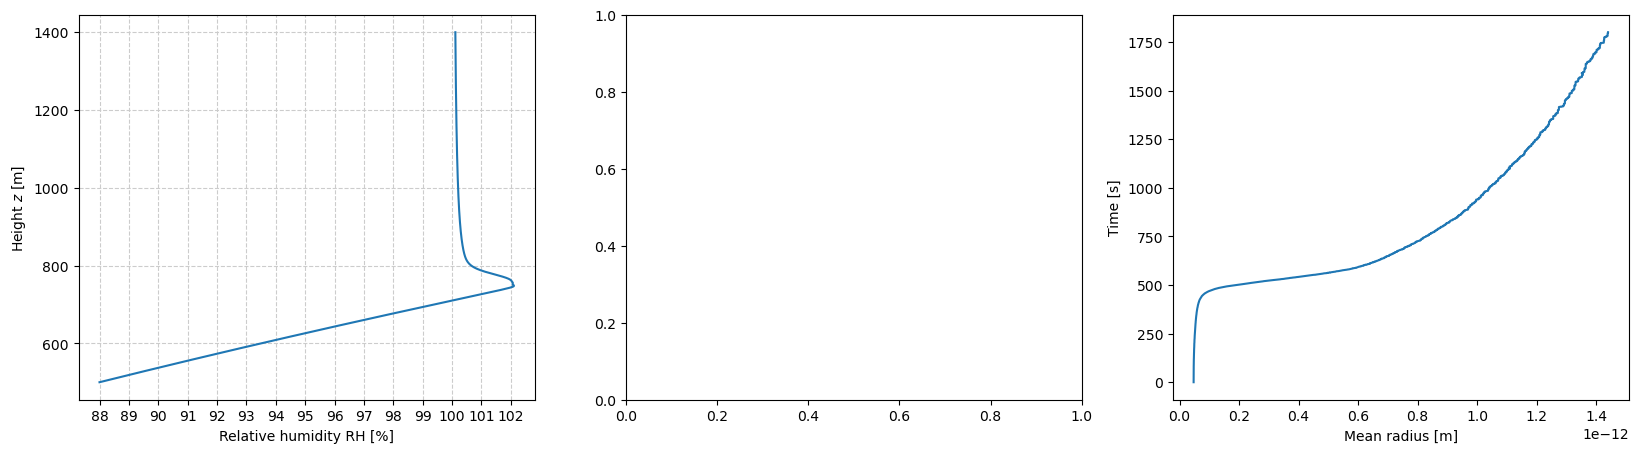

In [169]:
fig, ax = plt.subplots(1, 3, figsize=(20,5))
time_array = np.arange(nt+1)*dt

# AX 1: RH [%]
# ------------

ax[0].plot(RH_parcel_array*100, z_parcel_array)
ax[0].set_xlabel('Relative humidity RH [%]')
ax[0].set_ylabel('Height $z$ [m]')

# Major ticks
ax[0].xaxis.set_major_locator(MultipleLocator(1))
ax[0].yaxis.set_major_locator(MultipleLocator(200))

# Minor ticks
ax[0].xaxis.set_minor_locator(AutoMinorLocator(1))
ax[0].yaxis.set_minor_locator(AutoMinorLocator(4))

ax[0].grid(which='major', color='#CCCCCC', linestyle='--')
ax[0].grid(which='minor', color='#CCCCCC', linestyle=':')


# AX 2: Liquid number mixing ratio
# --------------------------------

# sum conc of each radius


# AX 3: Mean droplet radius
# -------------------------

spectra_arr_norm = (spectra_arr.T/spectra_arr.sum(axis=1)).T

ax[2].plot((spectra_arr_norm * rm_spec).sum(axis=1)/1e6, time_array)
ax[2].set_xlabel('Mean radius [m]')
ax[2].set_ylabel('Time [s]')

# Major ticks
ax[0].xaxis.set_major_locator(MultipleLocator(1))
ax[0].yaxis.set_major_locator(MultipleLocator(200))

# Minor ticks
ax[0].xaxis.set_minor_locator(AutoMinorLocator(1))
ax[0].yaxis.set_minor_locator(AutoMinorLocator(1))

ax[0].grid(which='major', color='#CCCCCC', linestyle='--')
ax[0].grid(which='minor', color='#CCCCCC', linestyle=':')


In [170]:
T_parcel_array

array([293.20005734, 293.19761702, 293.19517669, ..., 288.84909017,
       288.84822521, 288.84736022])